In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
arcope = ['Argentina', 'Colombia','Peru']

In [5]:
results = pd.read_csv('output/results_tax_unif_poor_.csv').set_index('country')
results = results.join(pd.read_csv('inputs/income_groups.csv', index_col=2, header = 4)[['Code','Region']].dropna(how = 'any'))
results.loc[arcope]

,gdp_pc_pp,gdp_pc_pp_A,pop,share1,urbanization_rate,gdp_pc_cd,T_rebuild_K,pi,income_elast,rho,...,social,v,v_shew,dWpc_currency,dWtot_currency,risk,resilience,risk_to_assets,Code,Region
country,,,,,,,,,,,,,,,,,,,,,
Argentina,18489.43489,10405.00000,43847430,0.050,0.91893,12449.216850,3.0,0.2,1.5,0.06,...,0.161627,2.289463,1.996412,129.026866,5.657496e+09,0.006978,0.621925,0.004340,ARG,Latin America & Caribbean
Colombia,13124.32484,13124.32484,48653419,0.039,0.76708,5805.605335,3.0,0.2,1.5,0.06,...,0.108933,1.417920,1.236426,230.254187,1.120265e+10,0.017544,0.764864,0.013419,COL,Latin America & Caribbean
Peru,12071.59238,12071.59238,31773839,0.046,0.78924,6045.650077,3.0,0.2,1.5,0.06,...,0.209883,1.152912,1.042232,339.821787,1.079744e+10,0.028151,0.740675,0.020850,PER,Latin America & Caribbean


In [6]:
lac = results[results['Region'] == 'Latin America & Caribbean'].index
la = ['Argentina', 'Bolivia','Brazil','Chile','Colombia','Costa Rica','Ecuador','El Salvador','Guatemala','Guyana','Honduras','Mexico','Nicaragua',
     'Panama','Paraguay','Peru','Uruguay']
# carib = lac.drop(la)
results = results.rename({'pop':'Population'}, axis=1)
results['Country'] = 'Other'
results.Country.loc[la] = 'Other Latin America'
# results.Country.loc['Colombia'] = 'Colombia'
results.Country.loc['Argentina'] = 'Argentina'
# results.Country.loc['Peru'] = 'Peru'

/Users/eugene/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


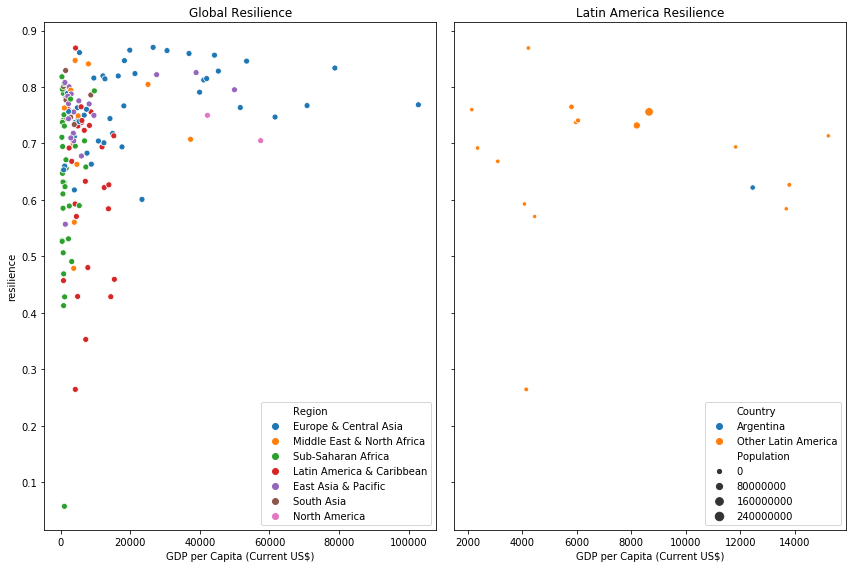

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,8), sharey= True)
sns.scatterplot(data = results, x = 'gdp_pc_cd', y = 'resilience',hue = 'Region',ax = ax1)
ax1.set_xlabel('GDP per Capita (Current US$)')
ax1.set_title('Global Resilience')
results['LAC'] = results.index.isin(la)
sns.scatterplot(data = results.loc[la], x = 'gdp_pc_cd', y = 'resilience',size = 'Population', hue = 'Country', ax = ax2)
ax2.set_title('Latin America Resilience')
plt.xlabel('GDP per Capita (Current US$)')
ax2.legend(loc = 'lower right')
plt.tight_layout()

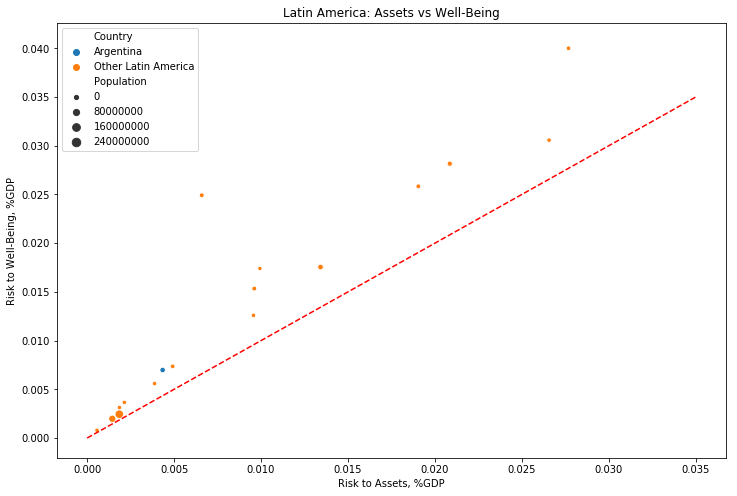

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'risk_to_assets', y = 'risk', data = results.loc[la], hue = 'Country', size = "Population")
plt.xlabel('Risk to Assets, %GDP')
plt.ylabel('Risk to Well-Being, %GDP')
plt.title('Latin America: Assets vs Well-Being')
plt.plot(np.linspace(0,0.035),np.linspace(0,0.035),'r--')

In [9]:
l = results.sort_values('resilience', ascending = False).reset_index().country

Text(20.875, 0.5, 'Risk to Well-Being, % GDP')

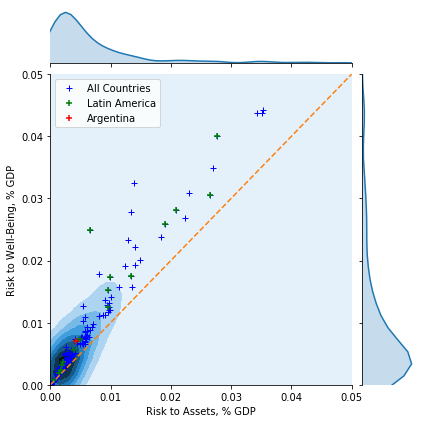

In [10]:
col = results.loc['Argentina']
lac_ = results.loc[la]
g = sns.jointplot(x = 'risk_to_assets', y = 'risk', data = results, kind = 'kde', xlim = (0,0.05), ylim = (0,0.05))
g.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker="+", label = 'All Countries')
# g.ax_joint.collections[0].set_alpha(0)
plt.scatter(lac_['risk_to_assets'],lac_['risk'],marker ='+',c = 'g', label = 'Latin America')
plt.scatter(col['risk_to_assets'],col['risk'],marker ='+',c = 'r', label = 'Argentina')
plt.xlabel('Risk to Assets, % GDP')
plt.plot (np.linspace(0,0.05), np.linspace(0,0.05), '--')
plt.legend()
plt.ylabel('Risk to Well-Being, % GDP')

In [11]:
df = pd.read_csv('intermediate/cat_info_un.csv')

In [12]:
poor = df.set_index(['income_cat','country']).loc['poor'].loc[la].sort_values('axfin')
rich = df.set_index(['income_cat','country']).loc['nonpoor'].loc[la].loc[poor.index]

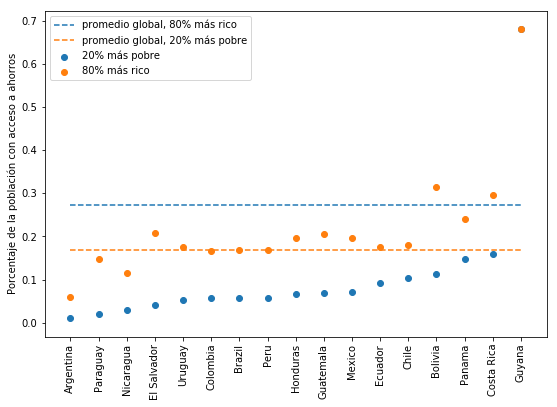

In [13]:
x = np.arange(0, len(poor))
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.scatter(poor.index, poor['axfin'], label = '20% más pobre')
plt.scatter(rich.index, rich['axfin'], label = '80% más rico')
plt.xticks(x)
ax.set_xticklabels( poor.index.values, rotation = 90)
plt.plot(x,np.ones(x.shape)*df.set_index(['income_cat','country']).loc['nonpoor'].mean()['axfin'], '--', label = 'promedio global, 80% más rico')
plt.plot(x,np.ones(x.shape)*df.set_index(['income_cat','country']).loc['poor'].mean()['axfin'], '--', label = 'promedio global, 20% más pobre')
plt.ylabel('Porcentaje de la población con acceso a ahorros')
plt.legend()

In [14]:
df = pd.read_csv('intermediate/fa_guessed_from_GAR_and_PAGER_shaved.csv')
_ = df.set_index(['hazard', 'country','rp','income_cat']).loc['flood'].loc[la].reorder_levels([1,0,2]).loc[1].reorder_levels([1, 0])
poor = _.loc['poor'].sort_values('v')
rich = _.loc['nonpoor'].loc[poor.index]

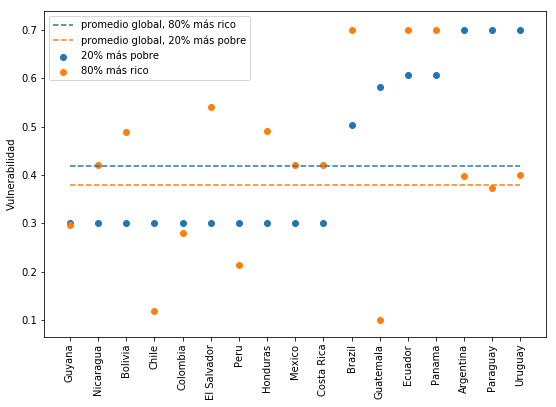

In [15]:
x = np.arange(0, len(poor))
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.scatter(poor.index, poor['v'], label = '20% más pobre')
plt.scatter(rich.index, rich['v'], label = '80% más rico')
plt.xticks(x)
ax.set_xticklabels( poor.index.values, rotation = 90)
plt.plot(x,np.ones(x.shape)*df.set_index(['income_cat','country']).loc['nonpoor'].mean()['v'], '--', label = 'promedio global, 80% más rico')
plt.plot(x,np.ones(x.shape)*df.set_index(['income_cat','country']).loc['poor'].mean()['v'], '--', label = 'promedio global, 20% más pobre')
plt.ylabel('Vulnerabilidad')
plt.legend()

In [25]:
df = pd.read_csv('inputs/wb_data.csv').set_index('country')
df = df[df.columns[['social' in s for s in df.columns]]].sort_values('social_p').dropna()
avs = df.mean()

In [26]:
avs

social_p    0.247613
social_r    0.152865
dtype: float64

In [23]:
df = pd.read_csv('inputs/wb_data.csv').set_index('country')
df = df[df.columns[['social' in s for s in df.columns]]].loc[la].sort_values('social_p').dropna()

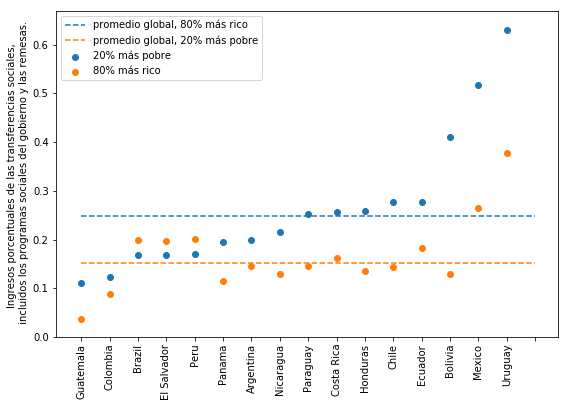

In [18]:
x = np.arange(0, len(poor))
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.scatter(df.index, df['social_p'], label = '20% más pobre')
plt.scatter(df.index, df['social_r'], label = '80% más rico')
plt.xticks(x)
ax.set_xticklabels(df.index.values, rotation = 90)
plt.plot(x,np.ones(x.shape)*avs.iloc[0], '--', label = 'promedio global, 80% más rico')
plt.plot(x,np.ones(x.shape)*avs.iloc[1], '--', label = 'promedio global, 20% más pobre')
# plt.plot(x,np.ones(x.shape)*df.set_index(['income_cat','country']).loc['poor'].mean()['axfin'], '--', label = 'promedio global, 20% más pobre')
plt.ylabel('Ingresos porcentuales de las transferencias sociales, \n incluidos los programas sociales del gobierno y las remesas.')
plt.legend()

In [19]:
df = pd.read_csv('output/results_tax_unif_poor_.csv').set_index('country')
df.rank(method = 'average', ascending = False).loc['Argentina']

gdp_pc_pp                  47.0
gdp_pc_pp_A                77.0
pop                        32.0
share1                    115.0
urbanization_rate           6.0
gdp_pc_cd                  38.0
T_rebuild_K                75.0
pi                         75.0
income_elast               75.0
rho                        75.0
shareable                  75.0
max_increased_spending     75.0
prepare_scaleup            44.0
borrow_abi                 98.5
avg_prod_k                 99.0
protection                 75.0
tau_tax                    84.0
macro_multiplier           99.0
dK                         44.0
dKtot                      23.0
delta_W                    80.0
delta_W_tot                37.0
average_aid_cost_pc        33.0
axfin                     132.0
c                          47.0
dc                         44.0
dc_npv_post                45.0
dc_npv_pre                 45.0
dk                         44.0
dw                         80.0
fa                         83.0
gamma_SP